# Compute MeltingStripes for regions in the Antarctic

In [1]:
# initial "melting stripes" script based on sebastianbeyer's warming script from github (https://github.com/sebastianbeyer/warmingstripes)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### load data from NASA

In [2]:
## get data from file
## this one is from earth.gsfc.nasa.gov
!wget -nv --mirror --no-host-directories --user=anonymous --password=anonymous -P regional-extent https://earth.gsfc.nasa.gov/sites/default/files/neptune/files/SH_IceExt_Monthly_1978-2017.txt

2021-01-10 15:49:44 URL:https://earth.gsfc.nasa.gov/sites/default/files/neptune/files/SH_IceExt_Monthly_1978-2017.txt [50579/50579] -> "regional-extent/sites/default/files/neptune/files/SH_IceExt_Monthly_1978-2017.txt" [1]
BEENDET --2021-01-10 15:49:44--
Verstrichene Zeit: 0,9s
Geholt: 1 Dateien, 49K in 0,2s (208 KB/s)


In [3]:
ls regional-extent/sites/default/files/neptune/files/SH_IceExt_Monthly_1978-2017.txt

regional-extent/sites/default/files/neptune/files/SH_IceExt_Monthly_1978-2017.txt


In [4]:
less regional-extent/sites/default/files/neptune/files/SH_IceExt_Monthly_1978-2017.txt

###### get data from file

In [5]:
data = np.loadtxt("regional-extent/sites/default/files/neptune/files/SH_IceExt_Monthly_1978-2017.txt", usecols = (0,1,2,3,4,5,6,7), skiprows=5)
names = ['Year','Month','Weddell Sea','Indian Ocean','Western Pacific Ocean','Ross Sea','Bellingshausen & Amundsen Seas','Total']

In [8]:
index=2
names[index], data[:,index]

('Weddell Sea',
 array([5680754., 4271317., 2136511., 1243496., 1699054., 2617442.,
        3852934., 5356938., 6185735., 6484833., 6538082., 6385107.,
        5927065., 4303617., 1943583., 1219234., 1456241., 2235921.,
        3823201., 5467587., 6585370., 7372905., 7678221., 7426332.,
        6492249., 4257910., 1291981.,  889965.,  985788., 1769935.,
        3266017., 5134911., 6258949., 6828599., 6997803., 6753770.,
        5951529., 4174821., 1634447., 1196652., 1411236., 2202518.,
        3383574., 4621369., 5605059., 6124550., 6312097., 6036768.,
        5386118., 3646833., 1984283., 1195456., 1418263., 2499265.,
        3523983., 4567317., 5537003., 5765633., 6498733., 6186763.,
        5751313., 4032695., 1705053., 1041413., 1376701., 2227126.,
        3371778., 4701105., 6066254., 6364665., 6506547., 6066306.,
        5732017., 4347875., 1572479.,  875806., 1056714., 2031796.,
        3385439., 4995098., 5764001., 6248392., 6318190., 6272189.,
        5813822., 4464540., 1886

##### start with Antarctic September sea ice extent

In [9]:
month=8 # 0 Jan, ... , 8 Sep
Year=data[month::12,0]
extent=data[month::12,index]/1e6
extent.max()

6.76806

In [10]:
Year

array([1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987.,
       1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996.,
       1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
       2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
       2015., 2016., 2017.])

In [11]:
def plot_meltingstripe(extent, region, month, vmin=1., vmax=10., save=False, annotate=False):
    
    stacked_extent = np.stack((extent, extent))

    ## plotting
    ###############

    fig=plt.figure(figsize=(4,5))
    ax1 = plt.imshow(stacked_extent, cmap='Blues_r', aspect=15, vmin=vmin, vmax=vmax)
    if annotate:
        plt.title(region+' Sea-Ice Extent ('+str(month)+' 1979-2017)',fontsize=12)

    plt.gca().set_axis_off()
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    
    if annotate:
        # Now adding the colorbar
        cbaxes = fig.add_axes([0.015, 0.05, 0.97, 0.1]) # left, top, width, height
        cb = plt.colorbar(ax1, cax = cbaxes, orientation='horizontal')  
        plt.text(0.4,0.3,'million km$^2$',fontsize=12)

    plt.show()

    if save:
        fig.savefig(str(month)+'/SHmeltingstripes_'+region+str(month)+'_vmin_'+str(vmin)+'_vmax_'+str(vmax)+'_annotate'+str(annotate)+'.png', bbox_inches = 'tight', pad_inches = 0, dpi=400)

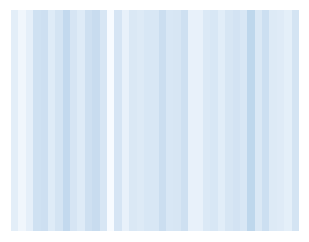

In [13]:
stacked_extent = np.stack((extent, extent))

vmin=1.
vmax=extent.max()

## plotting
###############

plt.figure(figsize=(4,18))
# img = plt.imshow(stacked_temps, cmap='RdBu_r', aspect=40, vmin=vmin, vmax=vmax)
img = plt.imshow(stacked_extent, cmap='Blues_r', aspect=15, vmin=vmin, vmax=vmax)

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.show()

#plt.savefig("meltingstripes_NH09_vmin0.png", bbox_inches = 'tight', pad_inches = 0, dpi=400)

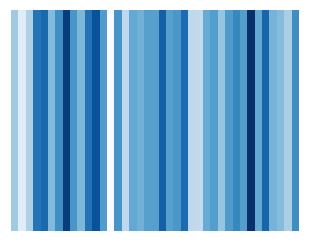

In [14]:
stacked_extent = np.stack((extent, extent))

vmin=extent.min()
vmax=extent.max()

## plotting
###############

plt.figure(figsize=(4,18))
# img = plt.imshow(stacked_temps, cmap='RdBu_r', aspect=40, vmin=vmin, vmax=vmax)
img = plt.imshow(stacked_extent, cmap='Blues_r', aspect=15, vmin=vmin, vmax=vmax)

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.show()

#plt.savefig("meltingstripes_NH09_realvmin.png", bbox_inches = 'tight', pad_inches = 0, dpi=400)

In [15]:
extent.min()
vmin,vmax # million square kilometres

(5.187343, 6.76806)

In [19]:
mkdir Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

mkdir: Jan: File exists
mkdir: Feb: File exists
mkdir: Mar: File exists
mkdir: Apr: File exists
mkdir: May: File exists
mkdir: Jun: File exists
mkdir: Jul: File exists
mkdir: Aug: File exists
mkdir: Sep: File exists
mkdir: Oct: File exists
mkdir: Nov: File exists
mkdir: Dec: File exists


19.0

2 Weddell Sea


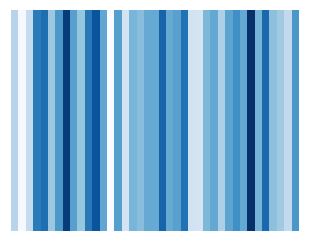

3 Indian Ocean


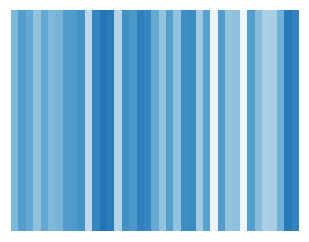

4 Western Pacific Ocean


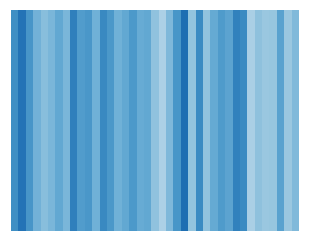

5 Ross Sea


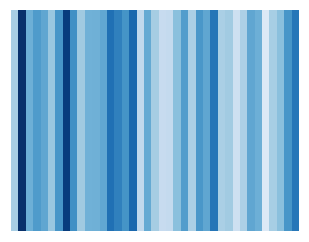

6 Bellingshausen & Amundsen Seas


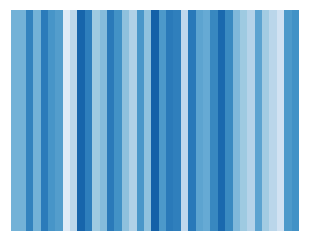

7 Total


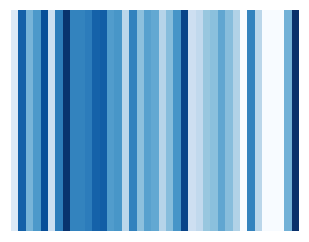

In [32]:
month=8 # September
#month=2
monthstring=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for i,region in enumerate(names[2:]):
    
    print i+2,region
    
    extent=data[month::12,i+2]/1e6
    
    plot_meltingstripe(extent=extent, region=region, month=monthstring[month], vmin=np.round(extent.mean(),1)-.7, vmax=np.round(extent.mean(),1)+.7, save=True, annotate=False)
    
    

In [21]:
np.arange(0,12)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

2 Weddell Sea
0


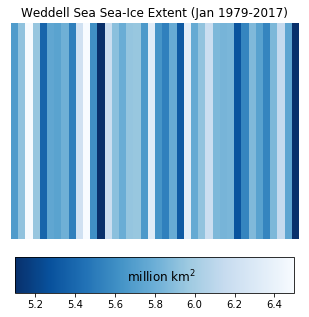

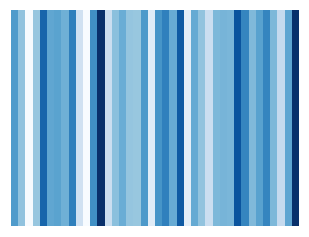

1


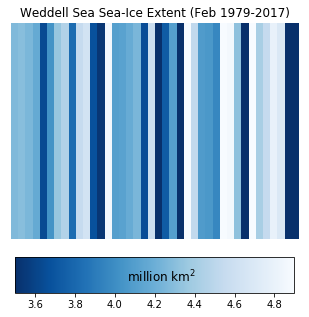

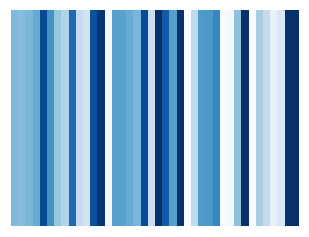

2


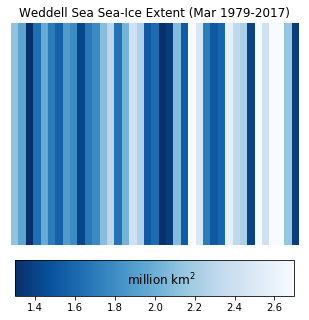

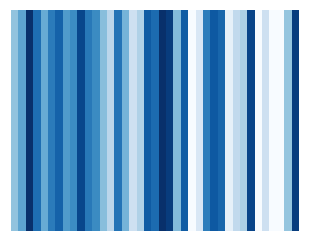

3


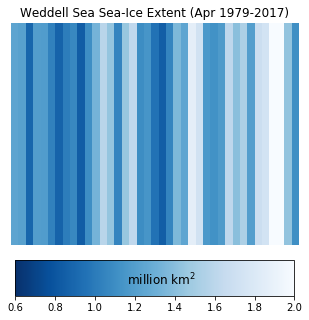

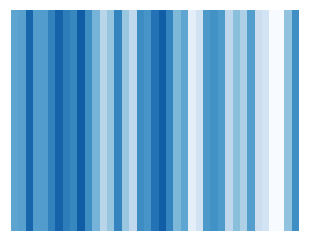

4


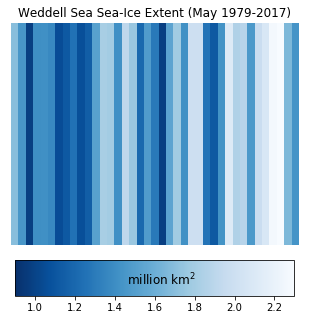

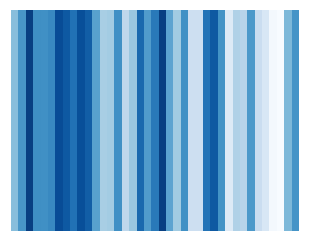

5


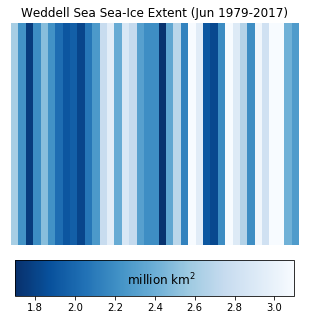

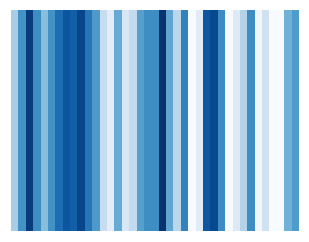

6


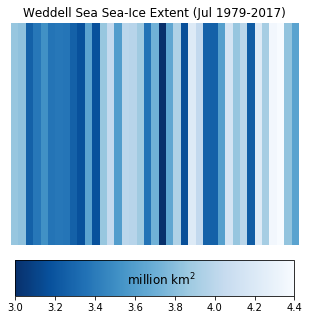

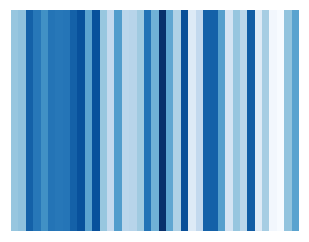

7


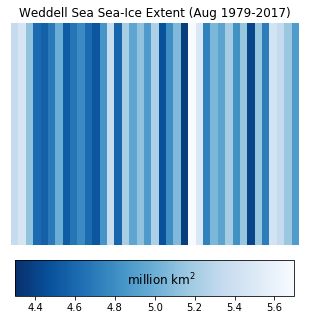

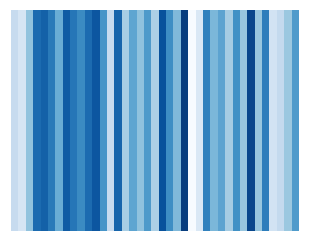

8


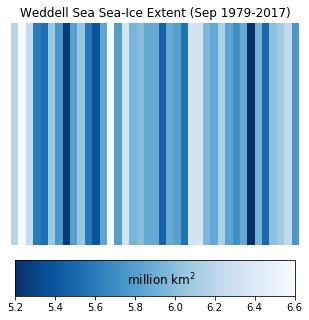

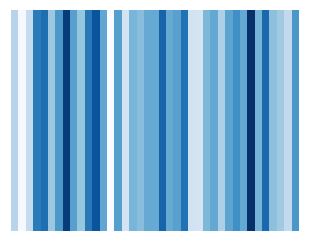

9


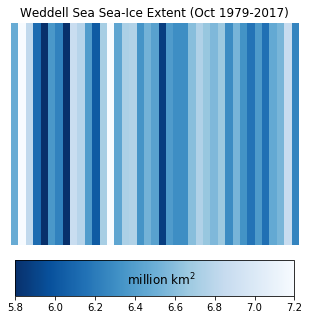

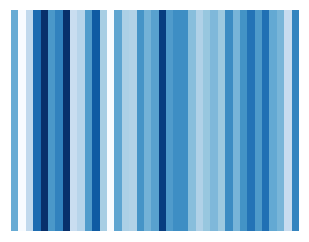

10


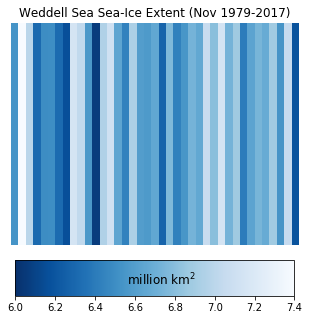

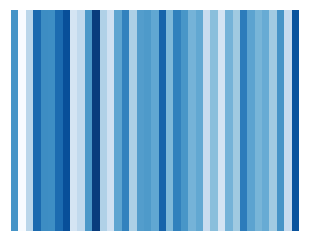

11


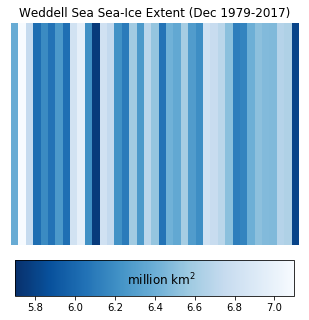

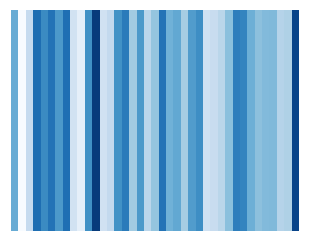

3 Indian Ocean
0


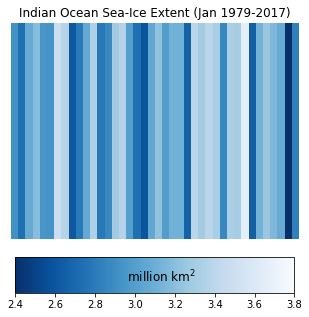

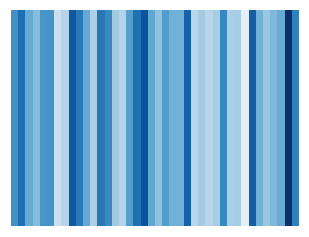

1


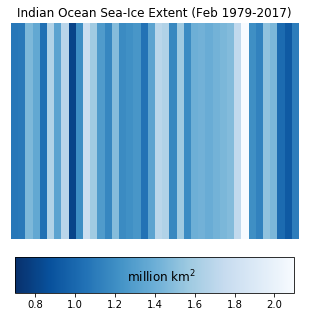

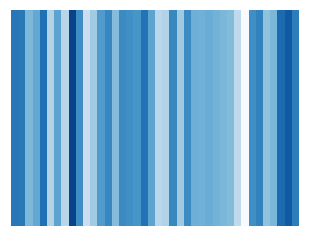

2


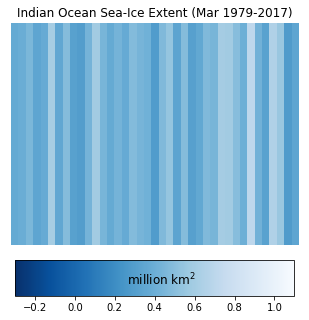

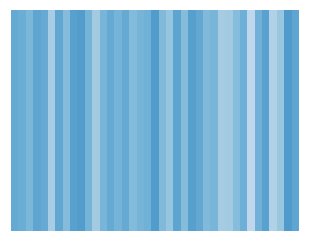

3


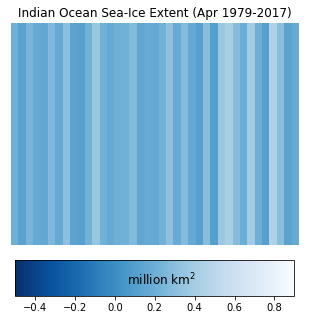

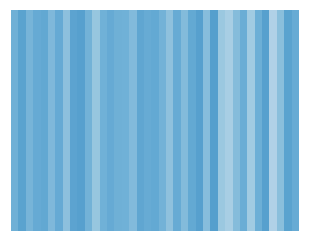

4


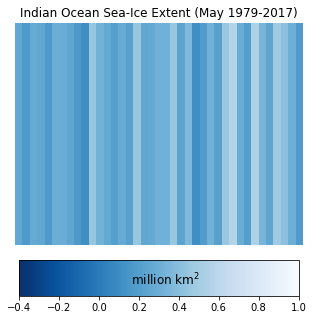

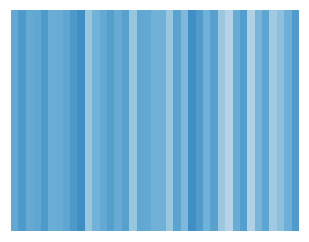

5


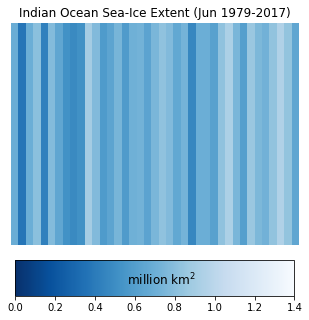

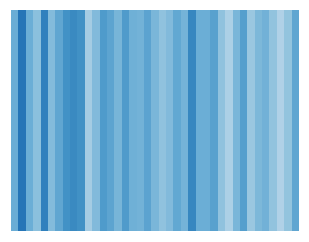

6


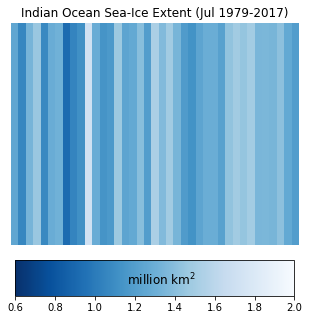

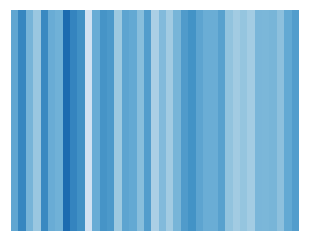

7


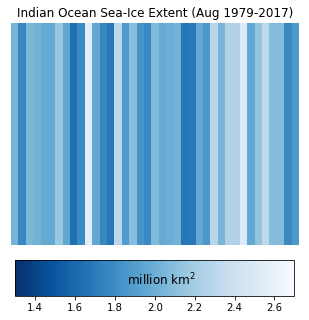

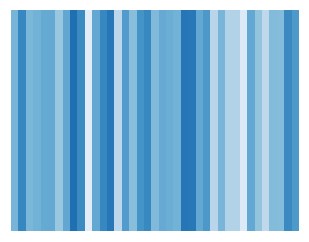

8


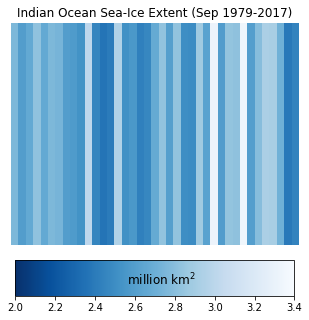

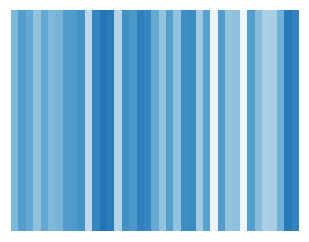

9


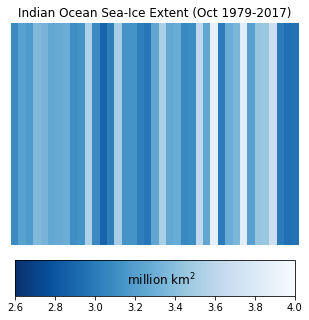

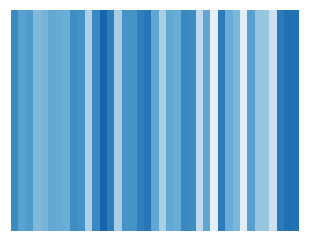

10


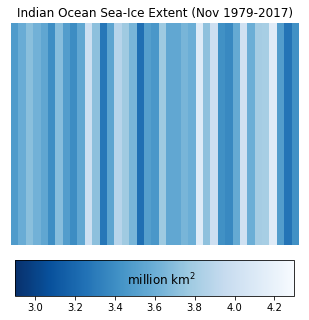

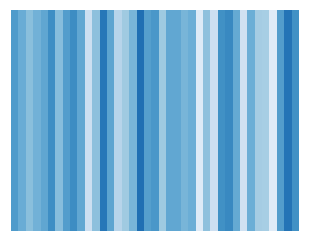

11


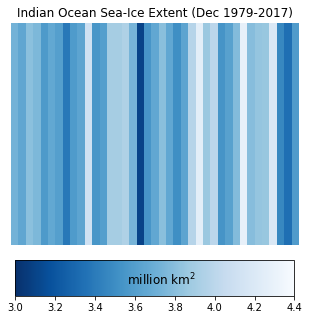

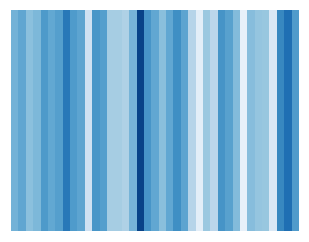

4 Western Pacific Ocean
0


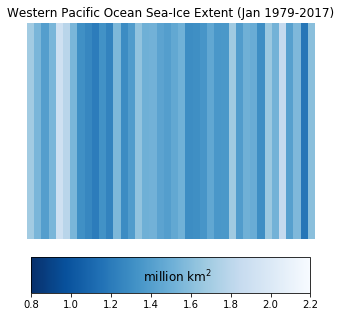

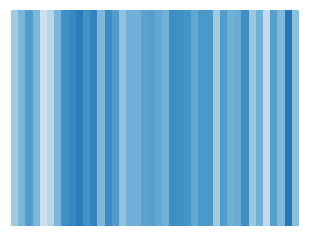

1


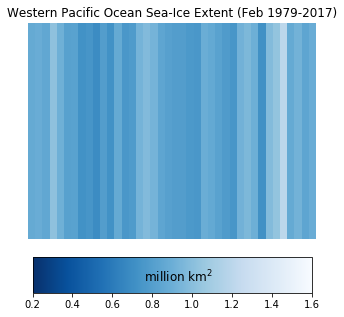

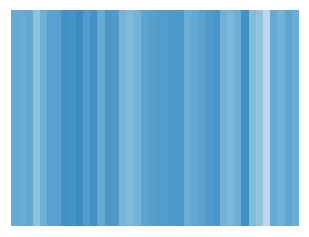

2


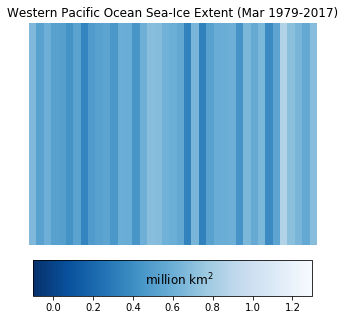

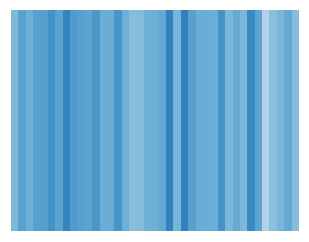

3


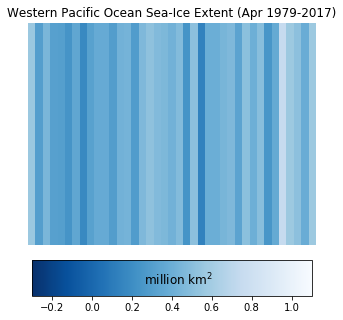

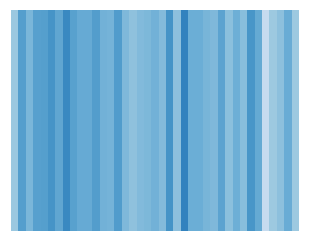

4


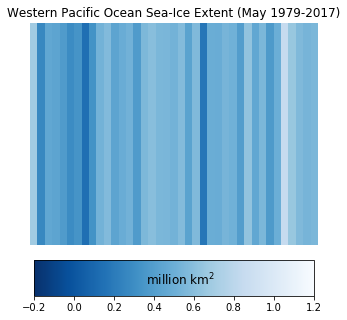

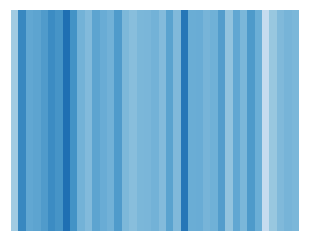

5


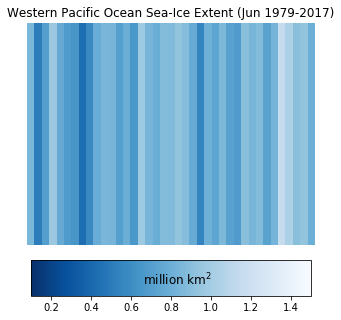

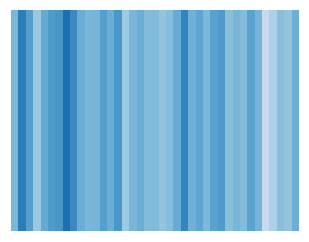

6


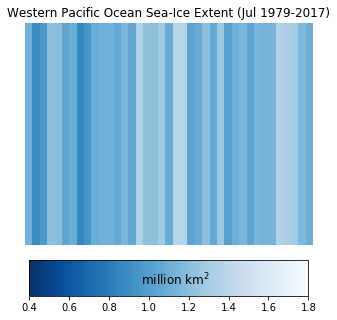

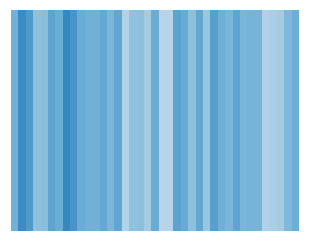

7


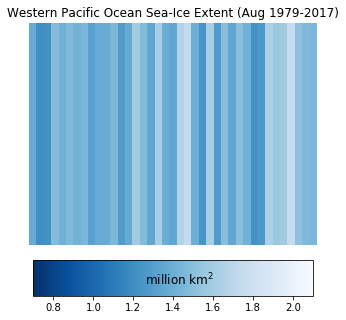

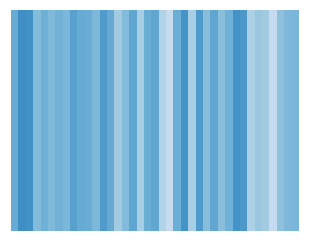

8


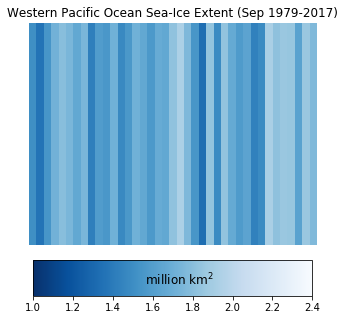

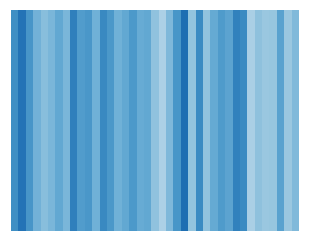

9


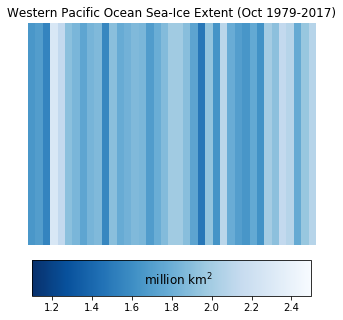

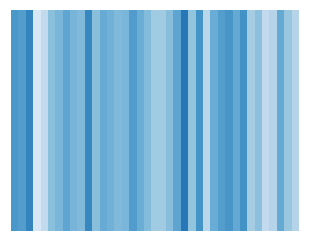

10


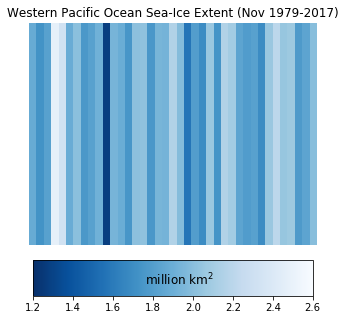

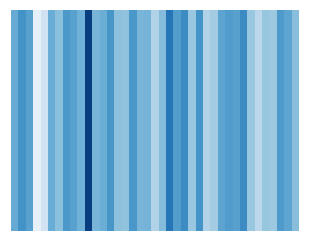

11


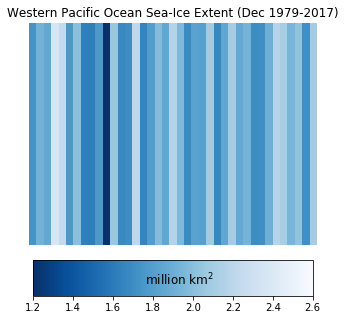

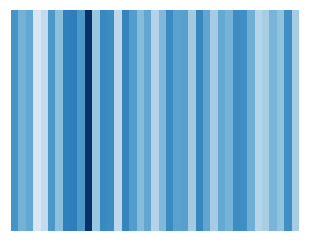

5 Ross Sea
0


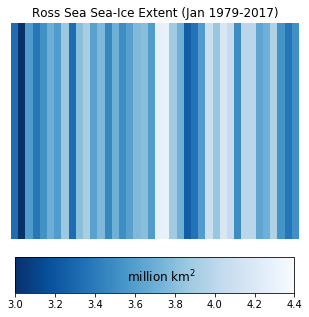

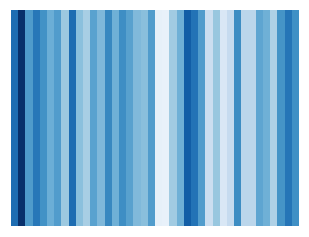

1


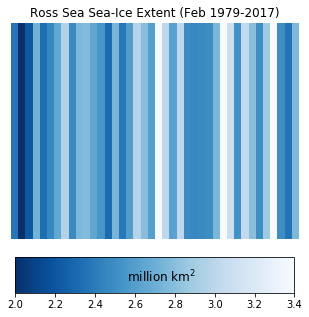

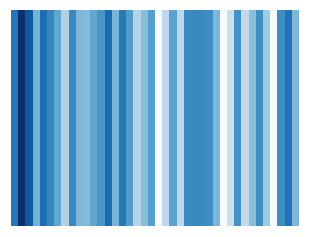

2


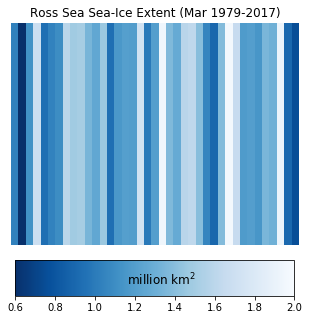

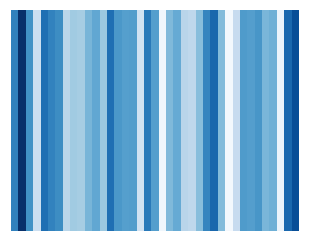

3


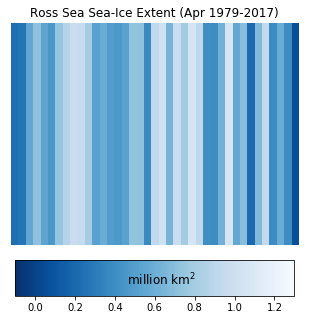

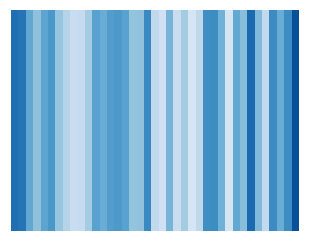

4


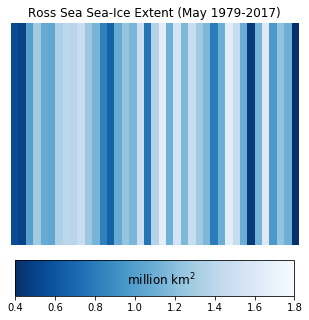

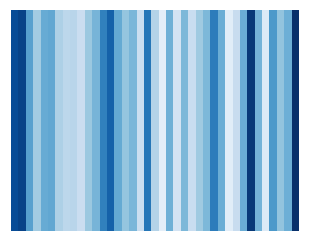

5


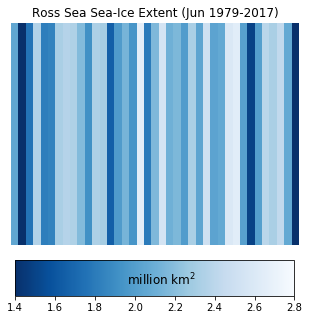

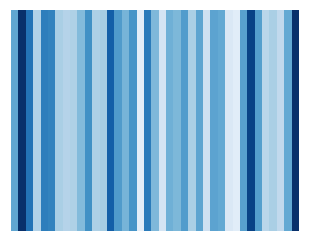

6


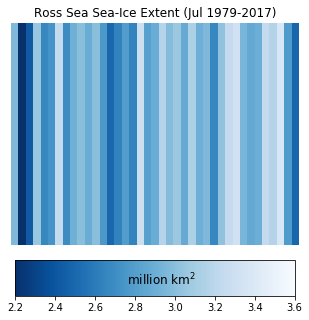

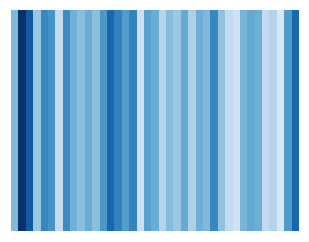

7


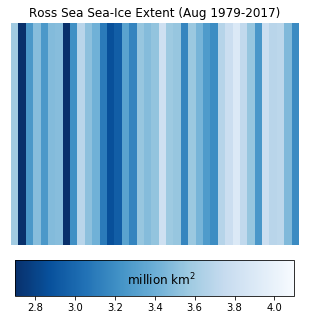

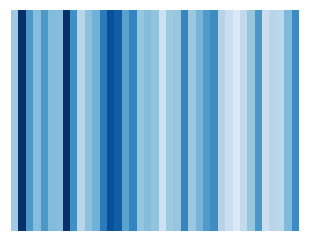

8


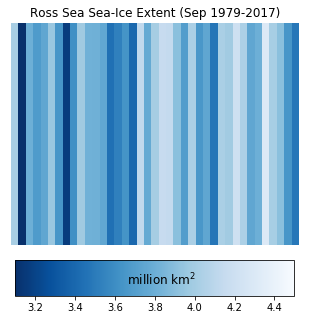

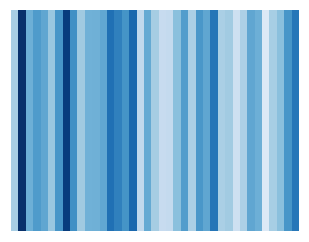

9


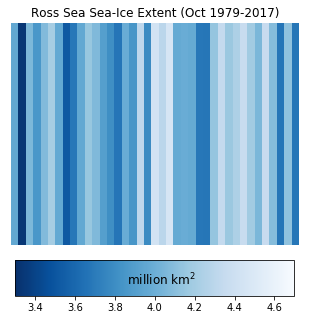

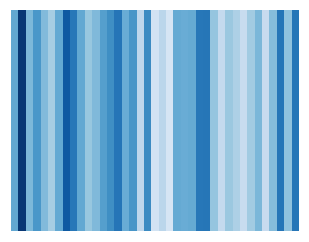

10


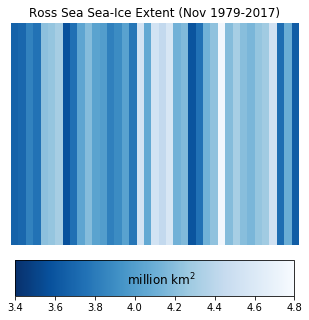

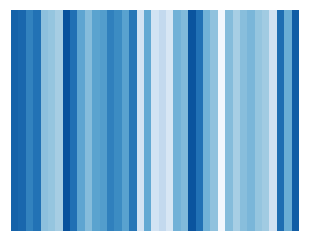

11


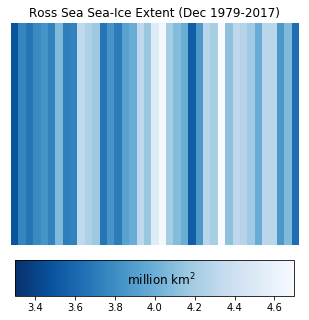

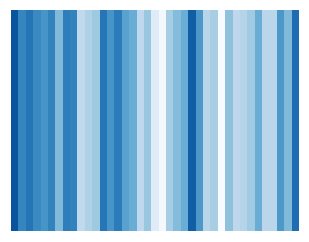

6 Bellingshausen & Amundsen Seas
0


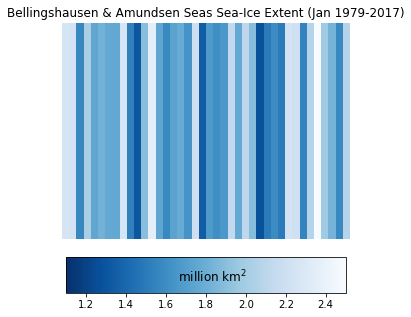

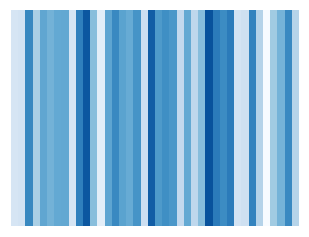

1


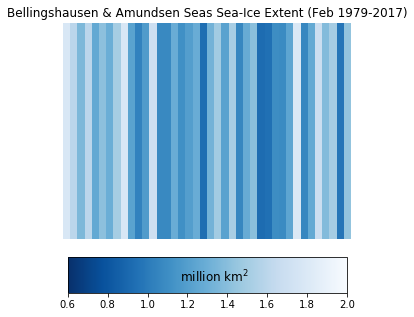

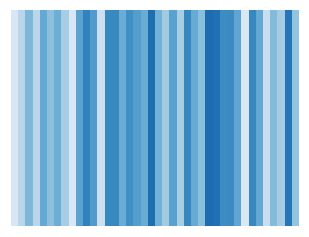

2


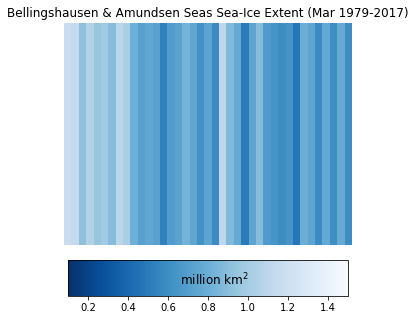

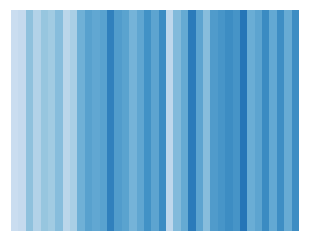

3


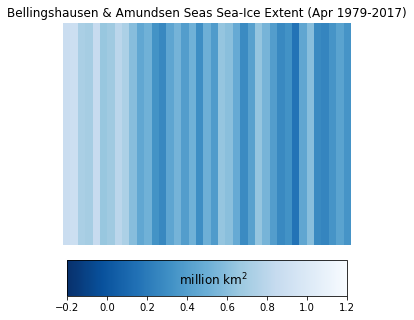

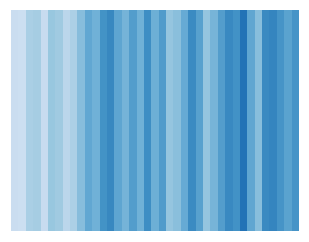

4


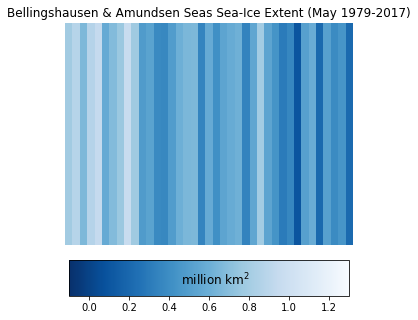

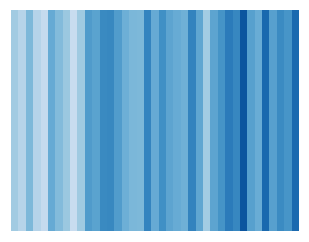

5


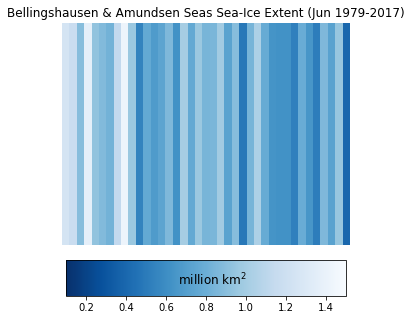

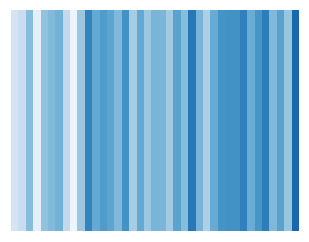

6


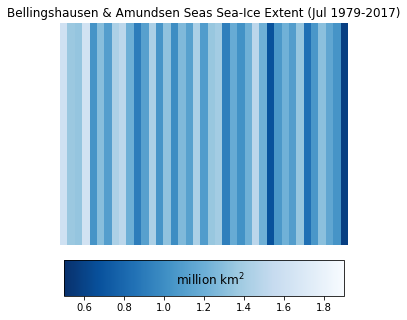

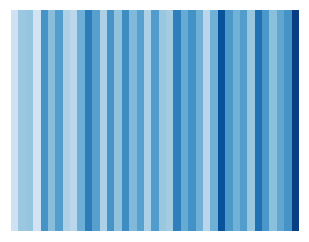

7


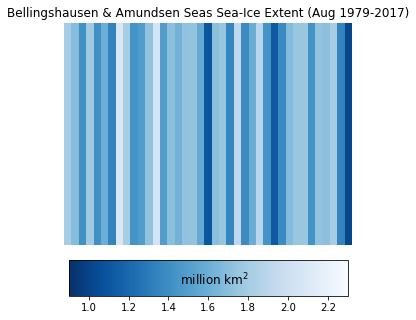

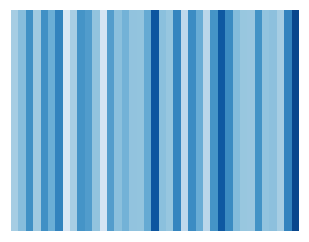

8


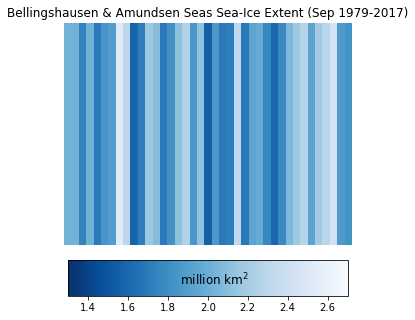

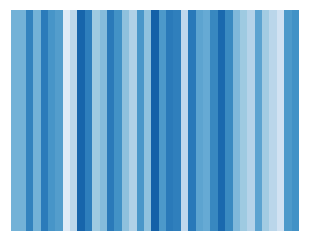

9


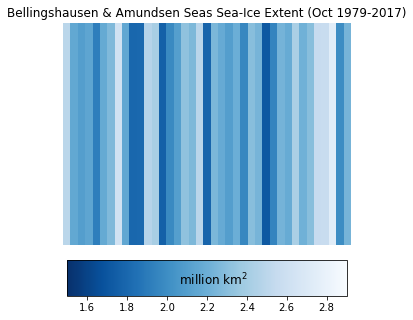

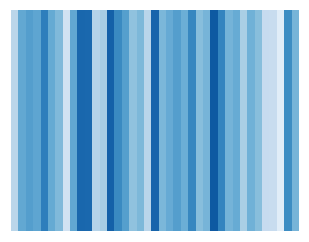

10


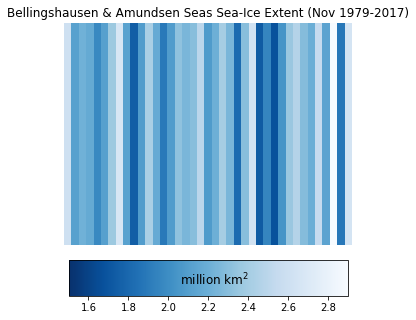

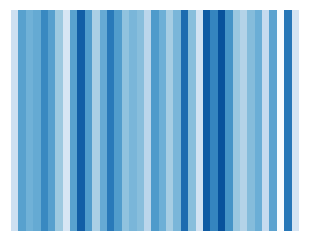

11


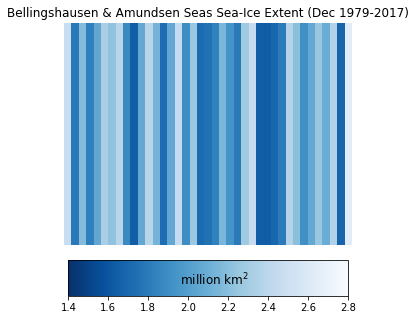

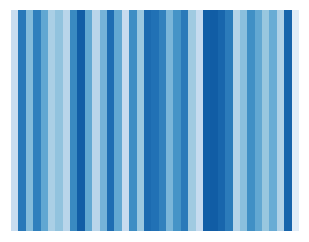

7 Total
0


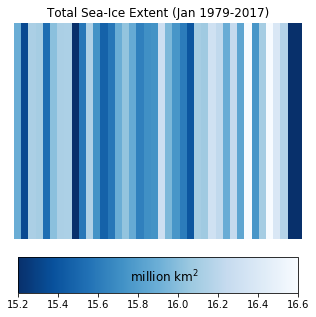

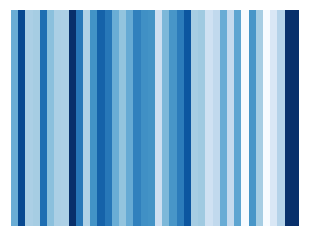

1


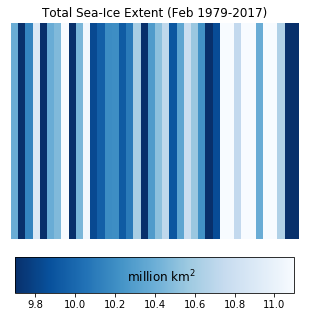

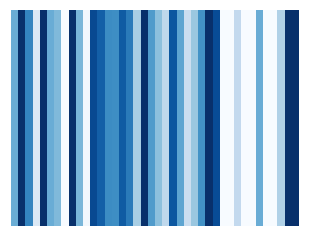

2


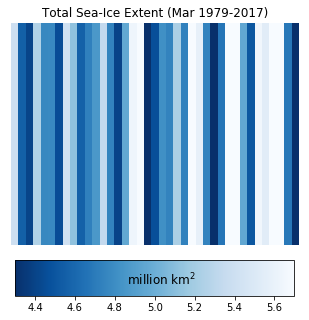

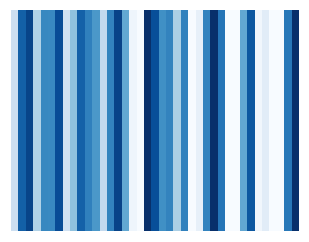

3


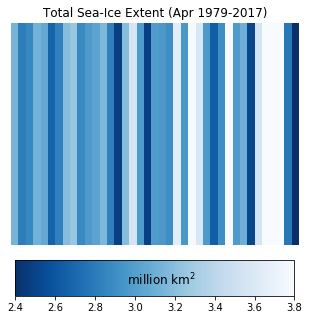

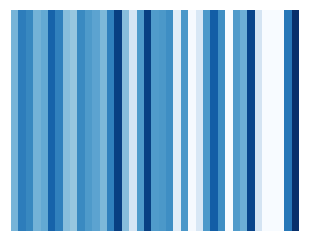

4


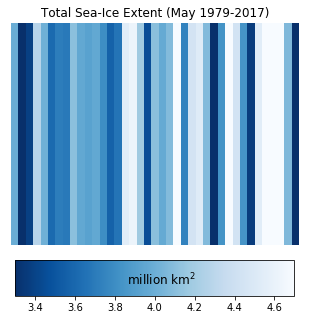

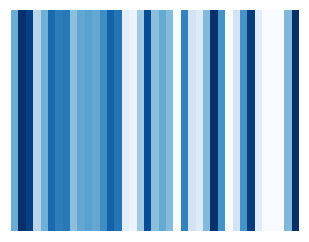

5


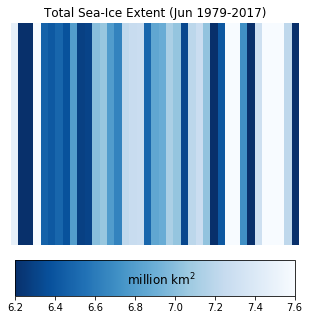

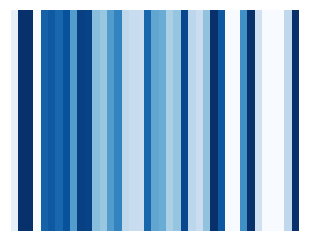

6


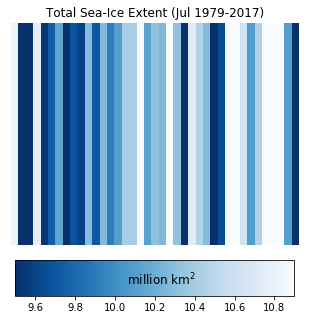

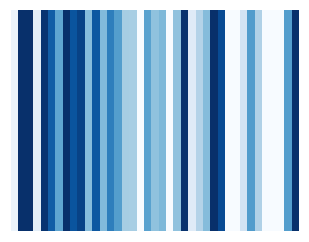

7


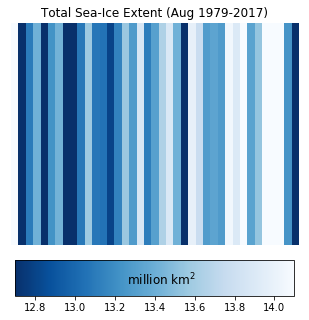

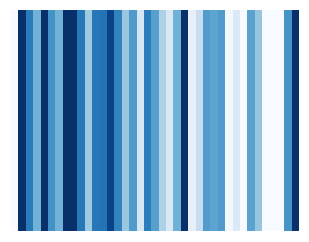

8


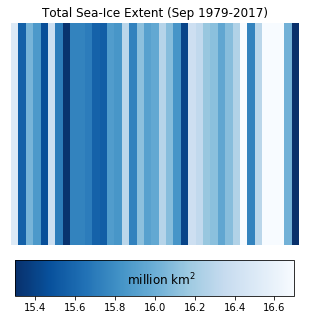

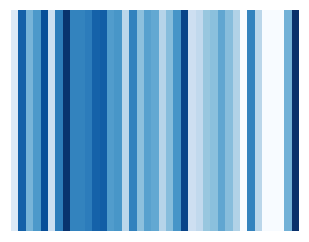

9


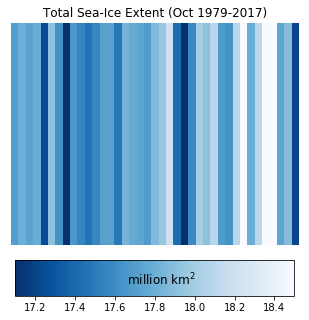

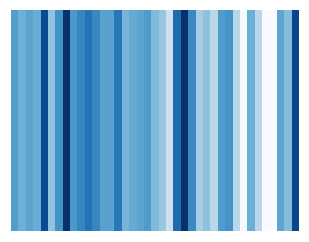

10


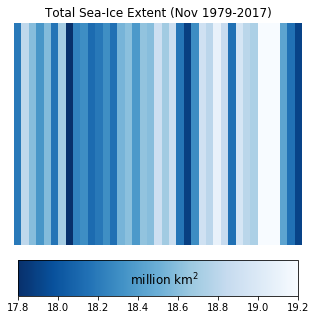

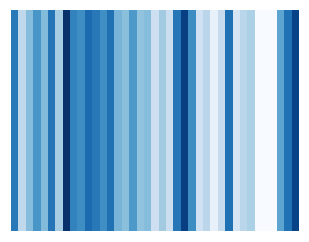

11


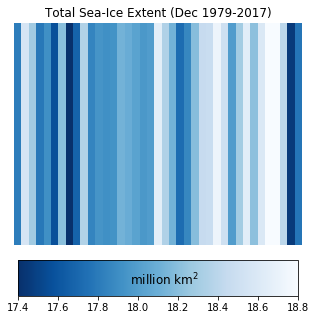

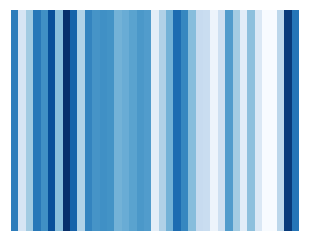

In [34]:
for i,region in enumerate(names[2:]):
    
    print i+2,region
    
    for month in np.arange(0,12):
        
        print month
        extent=data[month::12,i+2]/1e6
        
        for annotate in [True,False]:
            plot_meltingstripe(extent=extent, region=region, month=monthstring[month], vmin=np.round(extent.mean(),1)-.7, vmax=np.round(extent.mean(),1)+.7, save=True, annotate=annotate)
    

### AWI sea ice portal data; regions not available though

In [36]:
# Northern Hemisphere
!wget -nv --mirror --no-host-directories --user=anonymous --password=anonymous -P AWI-sea-ice-portal-2019 http://mep-datasrv1.awi.de/download/monthmean/tab_extent_mittel_09_n.txt 

2020-12-16 00:49:14 URL:http://mep-datasrv1.awi.de/download/monthmean/tab_extent_mittel_09_n.txt [672/672] -> "AWI-sea-ice-portal-2019/download/monthmean/tab_extent_mittel_09_n.txt" [1]
BEENDET --2020-12-16 00:49:14--
Verstrichene Zeit: 0,1s
Geholt: 1 Dateien, 672 in 0s (30,5 MB/s)


In [37]:
# how does the file look like?
!head -20 AWI-sea-ice-portal-2019/download/monthmean/tab_extent_mittel_09_n.txt

1979; 7084280.7
1980; 7705765.0
1981; 7164405.7
1982; 7330477.0
1983; 7414369.7
1984; 6888417.3
1985; 6727139.3
1986; 7424643.0
1987; 7278088.0
1988; 7372253.0
1989; 7006209.0
1990; 6126882.7
1991; 6464164.0
1992; 7472581.0
1993; 6374450.7
1994; 7128452.0
1995; 6058400.0
1996; 7580099.7
1997; 6674749.0
1998; 6518607.0


In [38]:
AWIdata = np.loadtxt("AWI-sea-ice-portal-2019/download/monthmean/tab_extent_mittel_09_n.txt", delimiter=";", usecols = (0,1))

In [39]:
extent=AWIdata[:,1]/10**6 # million km2

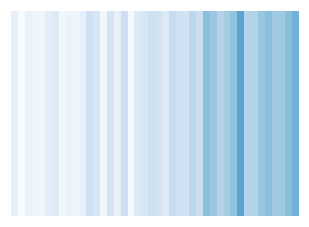

In [40]:
stacked_extent = np.stack((extent, extent))

vmin=0
vmax=extent.max()

## plotting
###############

plt.figure(figsize=(4,18))
# img = plt.imshow(stacked_temps, cmap='RdBu_r', aspect=40, vmin=vmin, vmax=vmax)
img = plt.imshow(stacked_extent, cmap='Blues_r', aspect=15, vmin=vmin, vmax=vmax)

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.show()

#plt.savefig("AWI_meltingstripes_NH09_vmin0.png", bbox_inches = 'tight', pad_inches = 0, dpi=400)

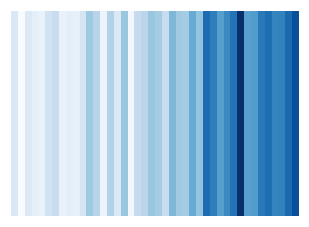

In [41]:
stacked_extent = np.stack((extent, extent))

vmin=extent.min()
vmax=extent.max()

## plotting
###############

plt.figure(figsize=(4,18))
# img = plt.imshow(stacked_temps, cmap='RdBu_r', aspect=40, vmin=vmin, vmax=vmax)
img = plt.imshow(stacked_extent, cmap='Blues_r', aspect=15, vmin=vmin, vmax=vmax)

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.show()

#plt.savefig("AWI_meltingstripes_NH09_realvmin.png", bbox_inches = 'tight', pad_inches = 0, dpi=400)

In [42]:
extent.min(), extent.max()

(3.4878373, 7.705765)

#### Add a colorbar for internal use

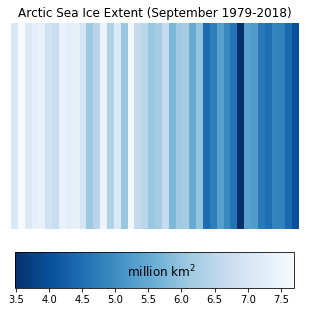

In [43]:
stacked_extent = np.stack((extent, extent))

vmin=extent.min()
vmax=extent.max()

## plotting
###############

fig=plt.figure(figsize=(4,5))
ax1 = plt.imshow(stacked_extent, cmap='Blues_r', aspect=15, vmin=vmin, vmax=vmax)
plt.title("Arctic Sea Ice Extent (September 1979-2018)",fontsize=12)

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

# Now adding the colorbar
cbaxes = fig.add_axes([0.015, 0.05, 0.97, 0.1]) # left, top, width, height
cb = plt.colorbar(ax1, cax = cbaxes, orientation='horizontal')  
plt.text(0.4,0.3,'million km$^2$',fontsize=12)

plt.show()

#plt.savefig("AWI_meltingstripes_NH09_colorbar.png", bbox_inches = 'tight', pad_inches = 0, dpi=400)

#### Meanwhile in Antarctica...

In [44]:
# Southern Hemisphere
!wget -nv --mirror --no-host-directories --user=anonymous --password=anonymous -P AWI-sea-ice-portal-2019 http://mep-datasrv1.awi.de/download/monthmean/tab_extent_mittel_09_s.txt 

2020-12-16 00:49:24 URL:http://mep-datasrv1.awi.de/download/monthmean/tab_extent_mittel_09_s.txt [672/672] -> "AWI-sea-ice-portal-2019/download/monthmean/tab_extent_mittel_09_s.txt" [1]
BEENDET --2020-12-16 00:49:24--
Verstrichene Zeit: 0,09s
Geholt: 1 Dateien, 672 in 0s (49,3 MB/s)


In [45]:
AWIdata_S = np.loadtxt("AWI-sea-ice-portal-2019/download/monthmean/tab_extent_mittel_09_s.txt", delimiter=";", usecols = (0,1))

In [46]:
extent_S=AWIdata_S[:,1]/10**6 # million km2

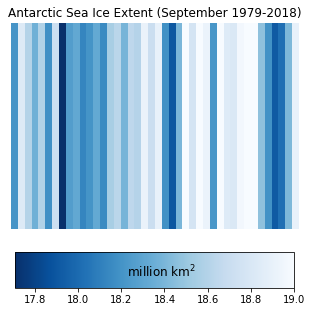

In [47]:
stacked_extent = np.stack((extent_S, extent_S))

vmin=extent_S.min()
vmax=19.0 # shows more details than extent_S.max()

## plotting
###############

fig=plt.figure(figsize=(4,5))
ax1 = plt.imshow(stacked_extent, cmap='Blues_r', aspect=15, vmin=vmin, vmax=vmax)
plt.title("Antarctic Sea Ice Extent (September 1979-2018)",fontsize=12)

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

# Now adding the colorbar
cbaxes = fig.add_axes([0.015, 0.05, 0.97, 0.1]) # left, top, width, height
cb = plt.colorbar(ax1, cax = cbaxes, orientation='horizontal')  
plt.text(0.4,0.3,'million km$^2$',fontsize=12)

plt.show()

#plt.savefig("AWI_meltingstripes_SH09_colorbar.png", bbox_inches = 'tight', pad_inches = 0, dpi=400)